# Problem statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
    
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

The steps for problem solving would be:
- Need to build the model for predicting bikes rent count (cnt)
- Evaluate the model
- Calculate the R2 score for test set
- List the significant variables effecting the count of bike rentals


## 1. Understand the given data set
In this step we try understand the test data set given.  We will go through the data dictionary and understand the columns check the values and dimensions of the data set etc.

In [1]:
# Libraris for data set operations
import numpy as np
import pandas as pd

# Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')







In [2]:
# Read the data
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# See the dimensions
data.shape

(730, 16)

In [4]:
# Validating the data for missing values and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

**Observation** <br>
It seems every column has correct number non null rows. The values are not missing

In [6]:
# Check the statistics of the data frame
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Cleaning and analyzing the data

### 2.1 Dropping the not required columns for the modeling


In [7]:
# list the columns
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# We can drop the instant as it is just an identifier of the record
# We can drop dteday.  As per the data dictionaty we have other features for the dates like yr, mnth and weekday etc.
# As per the data dictionary the cnt (target variable ) = casual + registered. We can remove these two columns

cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
data.drop(cols_to_drop, axis = 1, inplace = True)

In [9]:
#Checking the dropped columns
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.2 Checking for outliers

[]

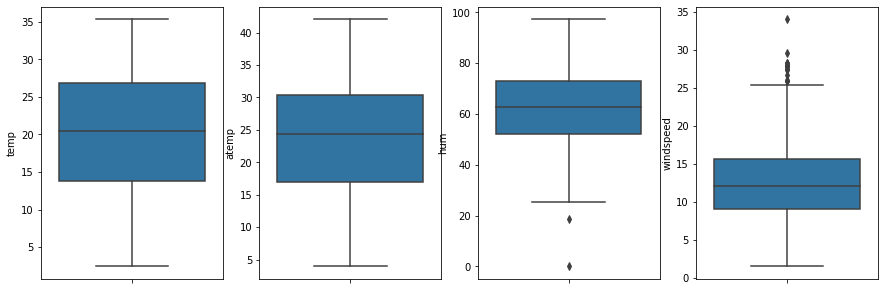

In [10]:
# As per above data 'temp', 'atemp', 'hum' ,'windspeed' and 'cnt' are contineous variables and 'cnt' is the dependent variable
# let us find out outliers in independent variables
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=data)
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=data)
plt.subplot(1,4,3)
sns.boxplot(y='hum', data=data)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=data)
plt.plot()

As per above we dont have considerable outliers

In [11]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.3 Converting some categorical data shown as numbers to actual categorical values

In [12]:
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.weathersit.replace({1:'clear',2:'mist_and_cloudy',3:'light_snow_rain',4:'heavy_snow_rain'},inplace = True)

data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist_and_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_and_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 2.4 Data visualization for checking patterns in data such as Linear relation, correlation etc.

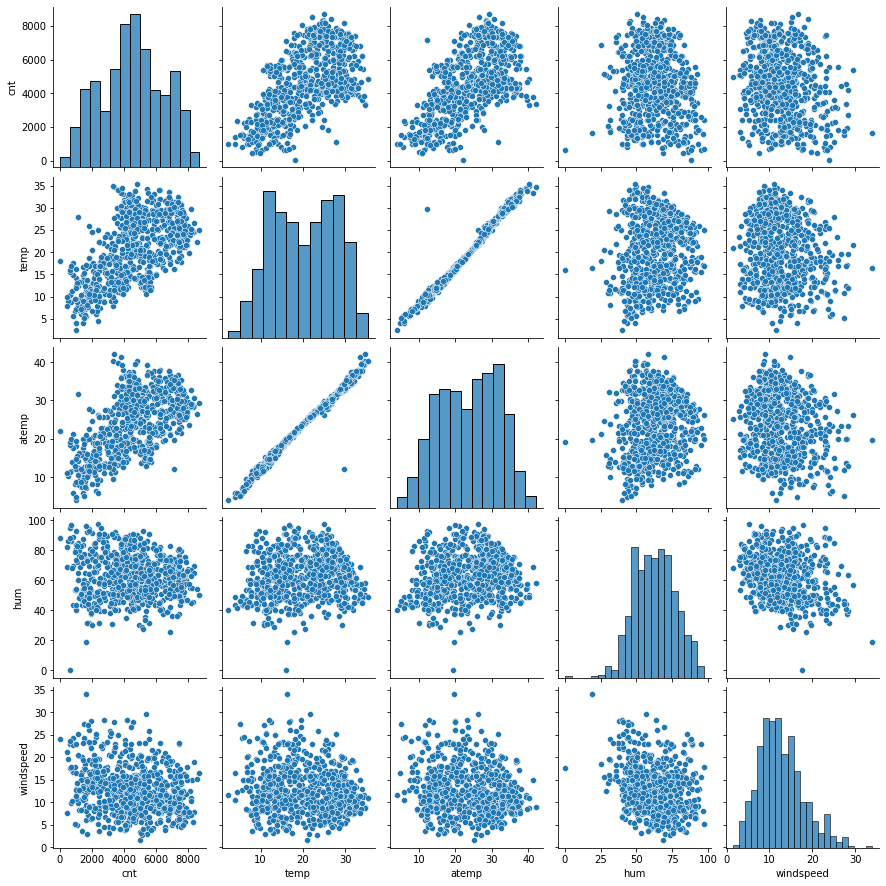

In [13]:
# Let us try to see the relationship between contineous variables
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Observations** <br>
It seems there is the linear relation between output variable 'cnt' and independent variables 'temp' and 'atemp'

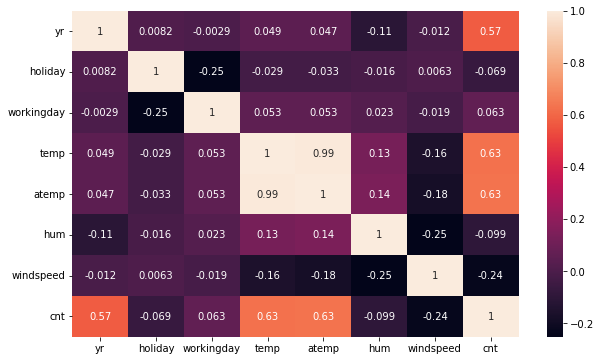

In [14]:
#Correlations for numeric variables
cor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,  annot = True)
plt.show()

'temp' and 'atemp' are independent variables highly correlated we need to consider only one but let us eliminate one of them based VIF after the model is built

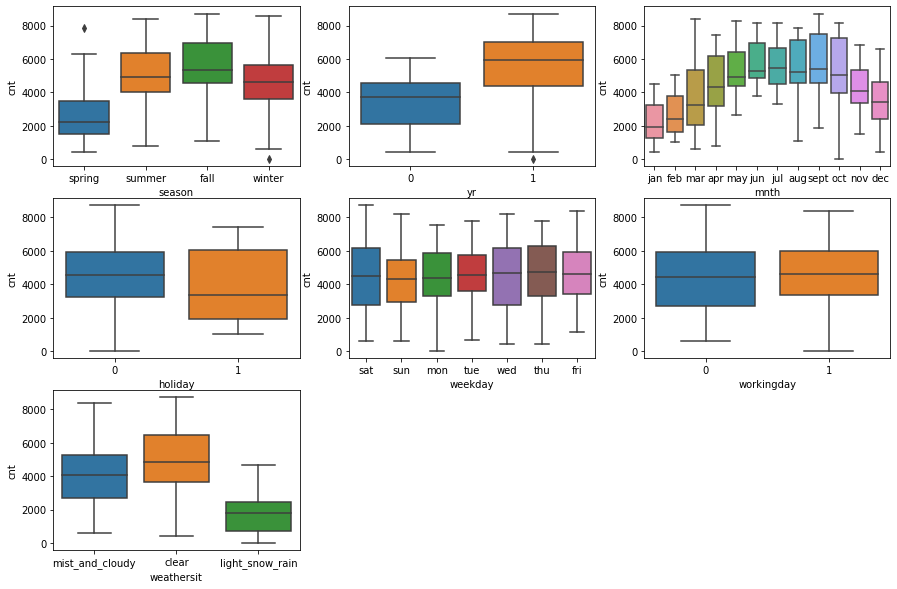

In [15]:
# Let us visualize the categorical variables
cat_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 10))
for i in enumerate(cat_variables):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

**Observations** <br>
1. The demand for rented bikes is high in fall
2. The demand is growing until september and then falls
3. The demand is less on holidays
4. The good weather has more demand


**Final observation after data cleaning and analysis**
1. The output variable 'cnt' has a linear relation ship with few of the independent variables such as temp, atemp etc.
2. We can build the linear regression model

## 3. Preparing the data for Linear regression model

### 3.1 Introduce the dummy variables for categorical data

In [16]:
# Check the columns
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
# Create the dummy variables for the categorical variables such as 'season','mnth','weekday' and 'weathersit'
# we can drop first dummy column as we need n-1 columns to represent n type of values
dummy_data = data[['season','mnth','weekday','weathersit']]
dummy_data = pd.get_dummies(dummy_data,drop_first=True )
data = pd.concat([dummy_data,data],axis = 1)
data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light_snow_rain,weathersit_mist_and_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.2 Split the data into train and test data

In [18]:
data.shape

(730, 30)

In [19]:
train_data, test_data = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
train_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light_snow_rain,weathersit_mist_and_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [21]:
# Checking shape and size for train and test
print(train_data.shape)
print(test_data.shape)

(510, 30)
(219, 30)


### 3.3 Scaling the features

In [22]:
# Few columns such as 'cnt','hum','windspeed','temp','atemp' have values on different scale. To make the model interpretation
# simple let us scale them to similar ones.  Let us use min-max scalar (standard scalar) for this
sc_cols = ['cnt','hum','windspeed','temp','atemp']
sc = MinMaxScaler()
train_data[sc_cols] = sc.fit_transform(train_data[sc_cols])

In [23]:
train_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light_snow_rain,weathersit_mist_and_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


## 4 - Building the model

### 4.1 Divide output variable from rest of the features

In [24]:
# Divide X and Y from the training data
y_train_data = train_data.pop('cnt')
X_train_data = train_data

In [25]:
X_train_data.shape

(510, 29)

### 4.2 Build the automated RFE for feature elimination

In [26]:
# Let us use SKLearn library for this
skModel = LinearRegression()
skModel.fit(X_train_data, y_train_data)

rfe = RFE(skModel, 13)           
rfe = rfe.fit(X_train_data, y_train_data)

In [27]:
list(zip(X_train_data.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 15),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_mist_and_cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [28]:
# Check the RFE selected columns
selected_cols = X_train_data.columns[rfe.support_]
selected_cols

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_light_snow_rain',
       'weathersit_mist_and_cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [29]:
# Filter the Training data set only selected columns
X_train_selected_data = X_train_data[selected_cols]

In [30]:
X_train_selected_data.head()

,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weathersit_light_snow_rain,weathersit_mist_and_cloudy,yr,holiday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1,0,0,0,0,1,0,1,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,1,0,1,1,0,0.395666,0.504508,0.188475


In [31]:
X_train_selected_data.shape

(510, 13)

**NOTE**
1. As we are going with RFE automated way for feature selection, we first build the model with all selected features
2. There would be repeated steps as below
    1. Build the model
    2. check the statistical values such as VIF, and R2 and P values of co-efficients
    3. Drop the columns based on above values 
    4. Repeat the steps until we get better model with good R2 score and P and VIFs are with in limits
**Let us develop some re-usable function to build the model and get VIF**

In [32]:
def build_model(Y,X):
    s_model = sm.OLS(Y, X).fit()
    print(s_model.summary())
    return s_model

def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
    

### 4.3 - Model - iteration 1

In [33]:
X_train_selected_data_st = sm.add_constant(X_train_selected_data)
s_model = build_model(y_train_data, X_train_selected_data_st)
check_VIF(X_train_selected_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.51e-190
Time:                        19:46:28   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Dropping features algorithm**
1. High P value - High VIF - drop it first
2. High P value - low VIF - drop it as second priority
3. Low P value - High VIF drop it as third priority
4. Low P value - low VIF dont dropt

### 4.4 - Model - iteration 2 drop one feature

In [34]:
# From above we can drop weekday_sat as it has high P value

X_train_selected_data = X_train_selected_data.drop(["weekday_sat"], axis = 1)
X_train_selected_data_st = sm.add_constant(X_train_selected_data)
s_model = build_model(y_train_data, X_train_selected_data_st)
check_VIF(X_train_selected_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.69e-190
Time:                        19:46:28   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 4.5 - Model - iteration 3 drop one feature

In [35]:
# From above we can drop hum as it has low P value and high VIF

X_train_selected_data = X_train_selected_data.drop(["hum"], axis = 1)
X_train_selected_data_st = sm.add_constant(X_train_selected_data)
s_model = build_model(y_train_data, X_train_selected_data_st)
check_VIF(X_train_selected_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.40e-187
Time:                        19:46:28   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Now it seems we have good VIF and P values. We can confirm this as our final model**

## 5. Residual analysis

In [36]:
y_train_pred_data = s_model.predict(X_train_selected_data_st)

Text(0.5, 0, 'Errors')

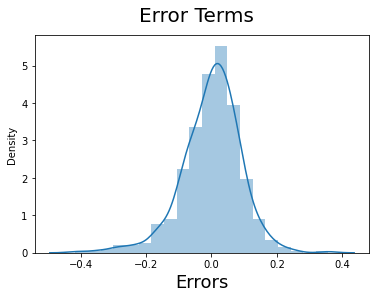

In [37]:
fig = plt.figure()
sns.distplot((y_train_data - y_train_pred_data), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [38]:
r2_score(y_train_data,y_train_pred_data)

0.8357767594654057

**The R2 value is at par with final model**

## 6. Making predictions on the test set

In [39]:
# Above we have already has the list of scalable columns in sc_cols variable
test_data[sc_cols] = sc.fit_transform(test_data[sc_cols])
test_data.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_light_snow_rain,weathersit_mist_and_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148


In [40]:
test_data.shape

(219, 30)

In [41]:
# Take out the output variable from test data as a seperate frame
y_test_data = test_data.pop('cnt')
# Select only those columns used in training data
X_test_data = test_data[X_train_selected_data.columns]

In [42]:
# Add the constant as we are using stats model
X_test_data = sm.add_constant(X_test_data)
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   season_spring               219 non-null    uint8  
 2   season_summer               219 non-null    uint8  
 3   season_winter               219 non-null    uint8  
 4   mnth_jul                    219 non-null    uint8  
 5   mnth_sept                   219 non-null    uint8  
 6   weathersit_light_snow_rain  219 non-null    uint8  
 7   weathersit_mist_and_cloudy  219 non-null    uint8  
 8   yr                          219 non-null    int64  
 9   holiday                     219 non-null    int64  
 10  temp                        219 non-null    float64
 11  windspeed                   219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [43]:
y_test_pred_data = s_model.predict(X_test_data)

## 7. The R2 score on test set

In [44]:
r2_score(y_test_data, y_test_pred_data)

0.7946441655503017

The R2 score for the test set is at par with traning data

Text(0, 0.5, 'y_pred')

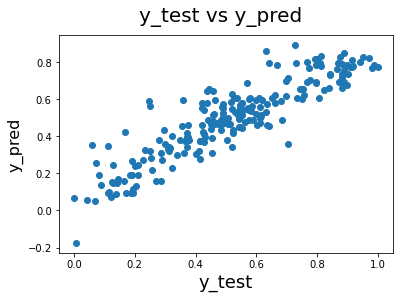

In [45]:
fig = plt.figure()
plt.scatter(y_test_data, y_test_pred_data)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [46]:
# let us look at the final model co-efficients
s_model.params

const                         0.199648
season_spring                -0.066942
season_summer                 0.045280
season_winter                 0.083084
mnth_jul                     -0.052418
mnth_sept                     0.076686
weathersit_light_snow_rain   -0.285155
weathersit_mist_and_cloudy   -0.081558
yr                            0.233482
holiday                      -0.098013
temp                          0.491508
windspeed                    -0.147977
dtype: float64

**Final observations**
- All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
- All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.
- The 'temp' having high co-efficient and positive is most significant to increase the value of cnt
- Next is weathersit_Light Snow & Rain that are impacting cnt